# Time Results

In [1]:
import sys

import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append('../src')
import raybay
from utils import patients, get_plan_path

In [2]:
def get_time_df(plan_type):
    df = pd.DataFrame({
        'patient': patients,
        'plan_type': 10*[plan_type],
        'plan_time': [get_plan_time(patient, plan_type) for patient in patients]
    })
    return df

def get_plan_time(patient, plan_type):
    if plan_type in ('clinical', 'default'):
        raise Exception(f"Time not recorded for {plan_type} plans.")
    plan = np.load(patient + get_plan_path(plan_type), allow_pickle=True)
    return plan.time/3600.0

In [3]:
time_df = pd.concat([get_time_df(plan_type) for plan_type in ['random', 'bayes']])
time_df.groupby('plan_type').describe()

plan_time                                                    \
              count      mean       std       min       25%       50%   
plan_type                                                               
bayes          10.0  2.377229  0.537746  1.806067  2.063525  2.268685   
random         10.0  2.011782  0.541586  1.307687  1.563225  1.930469   

                               
                75%       max  
plan_type                      
bayes      2.528324  3.644062  
random     2.413470  2.880300

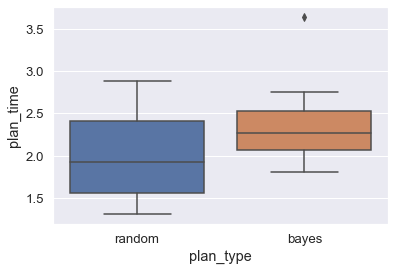

In [4]:
sns.boxplot(x='plan_type', y='plan_time', data=time_df);